In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils

# fix a random seed for reproducibility
np.random.seed(9)

In [3]:
nb_epoch = 10
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
v_length = 784

In [4]:
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))


[INFO] train data shape: (60000, 28, 28)
[INFO] test data shape: (10000, 28, 28)
[INFO] train samples: 60000
[INFO] test samples: 10000


In [5]:
# reshape the dataset
trainData = trainData.reshape(train_size, v_length)
testData = testData.reshape(test_size, v_length)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255

print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))

[INFO] train data shape: (60000, 784)
[INFO] test data shape: (10000, 784)
[INFO] train samples: 60000
[INFO] test samples: 10000


In [6]:
# convert class vectors to binary class matrices --> one-hot encoding
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)


In [7]:
# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

# summarize the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)  

In [8]:
# compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [9]:
# fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, nb_epoch=nb_epoch, verbose=2)


Instructions for updating:
Use tf.cast instead.


C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2647 - acc: 0.9212 - val_loss: 0.1092 - val_acc: 0.9661
Epoch 2/10
 - 7s - loss: 0.1070 - acc: 0.9670 - val_loss: 0.0836 - val_acc: 0.9734
Epoch 3/10
 - 7s - loss: 0.0761 - acc: 0.9768 - val_loss: 0.0696 - val_acc: 0.9778
Epoch 4/10
 - 6s - loss: 0.0589 - acc: 0.9814 - val_loss: 0.0696 - val_acc: 0.9789
Epoch 5/10
 - 6s - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0663 - val_acc: 0.9805
Epoch 6/10
 - 7s - loss: 0.0395 - acc: 0.9877 - val_loss: 0.0579 - val_acc: 0.9833
Epoch 7/10
 - 7s - loss: 0.0357 - acc: 0.9881 - val_loss: 0.0599 - val_acc: 0.9821
Epoch 8/10
 - 6s - loss: 0.0331 - acc: 0.9885 - val_loss: 0.0621 - val_acc: 0.9817
Epoch 9/10
 - 7s - loss: 0.0280 - acc: 0.9907 - val_loss: 0.0690 - val_acc: 0.9814
Epoch 10/10
 - 7s - loss: 0.0263 - acc: 0.9913 - val_loss: 0.0652 - val_acc: 0.9821


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


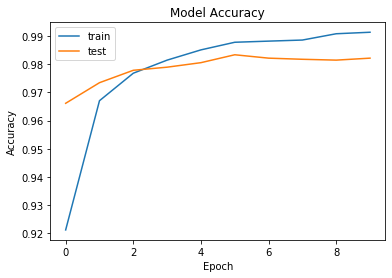

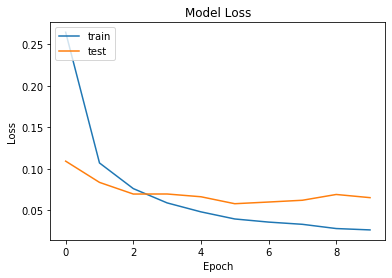

[INFO] test score - 0.06521168254973309
[INFO] test accuracy - 0.9821


In [10]:
# print the history keys
print(history.history.keys())

# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))


In [11]:
import cv2
from keras.preprocessing import image
test_images = cv2.imread("C:/Users/prabh/random.jpg")

#print(test_images)

#test_images.astype("float32")

test_images=cv2.cvtColor(test_images, cv2.COLOR_BGR2GRAY)
print(test_images.shape)


test_images=cv2.resize(test_images,(28,28))
test_pixel=image.img_to_array(test_images)
test_pixel=np.expand_dims(test_pixel,axis=0)
test_pixel/=255

#print(test_images.shape)
#org_image = test_images
test_pixel = test_pixel.reshape(1,784)
prediction = model.predict_classes(test_pixel, verbose=0)
print(prediction)
print("[INFO] I think the digit is - {}".format(prediction))

(1146, 508)
[5]
[INFO] I think the digit is - [5]
